In [36]:
api_key= '69e148611d200c7e3a489912f074fcef'

url='https://api.themoviedb.org/3/movie/top_rated?api_key=69e148611d200c7e3a489912f074fcef&language=en-US&page=1' 

In [230]:
import requests
import json
import numpy as np
import pandas as pd
import pickle


In [19]:
headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }
response = requests.get(url, headers=headers, params=url_params)


In [37]:
url_params = { 
              
            }

In [59]:
def yelp_call(url, url_params):
    headers = {
        'Authorization': 'Bearer {}'.format(api_key)}
    url='https://api.themoviedb.org/3/movie/top_rated?api_key=69e148611d200c7e3a489912f074fcef&language=en-US&page=1' 
      
    response = requests.get(url, headers=headers, params=url_params)
    data = json.loads(response.text)
    return data

In [63]:
yelp_call(url,url_params)

{'page': 3,
 'total_results': 7133,
 'total_pages': 357,
 'results': [{'popularity': 7.942,
   'vote_count': 325,
   'video': False,
   'poster_path': '/9eVhJgbvAuUuQlBAQtqYQp6j7AR.jpg',
   'id': 26451,
   'adult': False,
   'backdrop_path': None,
   'original_language': 'it',
   'original_title': 'Indagine su un cittadino al di sopra di ogni sospetto',
   'genre_ids': [80, 18],
   'title': 'Investigation of a Citizen Above Suspicion',
   'vote_average': 8.4,
   'overview': 'A chief of detectives, homicide section, kills his mistress and deliberately leaves clues to prove his own responsibility for the crime.',
   'release_date': '1970-11-13'},
  {'popularity': 16.296,
   'id': 3782,
   'video': False,
   'vote_count': 478,
   'vote_average': 8.4,
   'title': 'Ikiru',
   'release_date': '1952-10-09',
   'original_language': 'ja',
   'original_title': '生きる',
   'genre_ids': [18],
   'backdrop_path': '/j0zrfpozbek9OeapYYS9w8ECFn5.jpg',
   'adult': False,
   'overview': 'Kanji Watanabe is

In [42]:
def parse_data(data):
    # create a container to hold our parsed data
    parsed_data = []
    parsed_data= data['results']

In [79]:
page = 1
T=[]
while page <= 357:
    url_params['page'] = page
    movie_data=yelp_call(url, url_params)
    final_data=(movie_data)['results']
    T.extend(final_data)
    page +=1

In [229]:
import pickle
T=b
pickle.load(b)

NameError: name 'b' is not defined

In [81]:
data_save(T, 'imdbAPItotal.csv', columns=0)
            

In [70]:
def data_save(data, csv_filename, columns = 0):
    # your code to save the current results with all of the other results. 
    # I would save the data every time you pull 20 results
    # in case something breaks in the process.
    df=pd.DataFrame(data)
    df.to_csv(csv_filename)

In [210]:
df=pd.read_csv('imdbAPItotal.csv')
df.describe()
df['original_language'].value_counts()

en    5873
fr     445
it     270
ja     147
es      97
de      59
cn      37
ko      34
sv      23
pt      23
zh      23
ru      20
da      15
hi      11
no       9
nl       6
fa       6
th       5
id       4
tr       4
sr       3
pl       3
hu       2
te       2
ar       2
el       2
bs       1
xx       1
nb       1
fi       1
et       1
ro       1
la       1
eu       1
Name: original_language, dtype: int64

In [129]:
dfja=df[df['original_language']=='ja']#get only the Japanese language movies


In [293]:
df=df[df['original_language']=='en']
df_cleaned=df.drop(columns=['Unnamed: 0', 'adult', 'poster_path', 'backdrop_path'], axis=1)
df_cleaned.sort_values(by=['popularity'], ascending=False).describe()
df_no_outliers=df_cleaned.sort_values(by=['popularity'], ascending=False).iloc[4:5873]
# We learn that popularity scores are not based off 100 since most scores are in the 11.6 to 17.22 range. 
#we need to keep this in mind when we do our data analysis. I'll define any popularity under a 11.36 as unpopular

In [189]:
dfja_cleaned=dfja.drop( columns=['Unnamed: 0', 'adult', 'poster_path', 'backdrop_path'], axis=1)
dfja_cleaned.dropna(axis = 1)
dfja_cleaned.describe() # cleaned up table by dropping unnecessary columns and missing values 

,popularity,vote_count,id,vote_average
count,147.000000,147.000000,147.000000,147.000000
mean,13.899912,723.040816,117642.197279,7.333333
std,6.889111,1086.986918,162376.953643,0.738226
min,0.600000,200.000000,81.000000,5.000000
25%,9.580000,259.000000,11858.000000,6.800000
50%,12.461000,350.000000,28609.000000,7.500000
75%,15.803500,737.500000,185261.000000,7.900000
max,47.943000,9088.000000,568160.000000,8.500000


In [211]:
dfja_cleaned.columns

Index(['popularity', 'vote_count', 'video', 'id', 'original_language',
       'original_title', 'genre_ids', 'title', 'vote_average', 'overview',
       'release_date'],
      dtype='object')

In [205]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
dfja_sc[dfja_sc['popularity']<11.36].describe()
#This dataframe represents the movies with high vote average yet low popularity. The 11.36 is the mean popularity of 
#the entire dataset. There are 62 out of 147 movies with low popularity

,popularity,vote_count,id,vote_average
count,62.000000,62.000000,62.000000,62.000000
mean,8.854903,344.935484,143950.112903,7.204839
std,2.291749,326.590026,173024.749738,0.737836
min,0.600000,201.000000,2517.000000,5.000000
25%,8.198000,228.500000,14806.250000,6.725000
50%,9.351500,278.500000,39323.500000,7.350000
75%,10.337250,315.500000,283105.000000,7.700000
max,11.350000,2562.000000,513434.000000,8.400000


In [226]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
dfja_sc[dfja_sc['popularity']<15.99].describe()
#15.99 is the mean popularity for movies in our entire data. 111-62 = 59 are Japanese movies that 
#have average populaity  



,popularity,vote_count,id,vote_average
count,111.000000,111.000000,111.000000,111.000000
mean,10.954811,405.558559,133029.630631,7.201802
std,3.044772,313.416008,172738.662592,0.742842
min,0.600000,201.000000,327.000000,5.000000
25%,9.218000,241.500000,12822.000000,6.700000
50%,11.100000,285.000000,39100.000000,7.400000
75%,13.214500,430.000000,240908.500000,7.700000
max,15.924000,2562.000000,568160.000000,8.400000


In [202]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=False)
dfja_sc[dfja_sc['popularity']<17.22] #118-59-62= 3 movies were put into the more popular category


,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
1373,16.843,442,False,246,ja,座頭市,"[12, 18, 28]",Zatoichi,7.3,Zatoichi is a 19th century blind nomad who mak...,2003-09-06
35,16.792,505,False,18491,ja,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,"[18, 878, 16]",Neon Genesis Evangelion: The End of Evangelion,8.4,The second of two theatrically released follow...,1997-07-19
107,16.781,680,False,11878,ja,用心棒,"[18, 53]",Yojimbo,8.2,"A nameless ronin, or samurai with no master, e...",1961-04-25
1449,16.415,2013,False,3176,ja,バトル・ロワイアル,"[12, 18, 53]",Battle Royale,7.3,"In the future, the Japanese government capture...",2000-12-16
3303,16.406,844,False,126963,ja,ドラゴンボールZ 神と神,"[28, 16]",Dragon Ball Z: Battle of Gods,6.6,The events of Battle of Gods take place some y...,2013-03-30
...,...,...,...,...,...,...,...,...,...,...,...
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
1670,3.070,427,False,507569,ja,劇場版 七つの大罪 天空の囚われ人,"[28, 12, 16, 14]",The Seven Deadly Sins: Prisoners of the Sky,7.2,"Traveling in search of the rare ingredient, “s...",2018-08-18
873,3.031,1196,False,503314,ja,ドラゴンボール超スーパー ブロリー,"[28, 16, 878]",Dragon Ball Super: Broly,7.5,Earth is peaceful following the Tournament of ...,2018-12-14
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17


In [204]:
dfja_sc=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=False)
dfja_sc[dfja_sc['popularity']<=47.94]
#146-118 28 movies are very popular

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
6,38.029,5278,False,372058,ja,君の名は。,"[16, 18, 10749]",Your Name.,8.5,High schoolers Mitsuha and Taki are complete s...,2016-08-26
171,36.912,4251,False,8392,ja,となりのトトロ,"[16, 14, 10751]",My Neighbor Totoro,8.1,Two sisters move to the country with their fat...,1988-04-16
38,36.494,4826,False,4935,ja,ハウルの動く城,"[12, 16, 14]",Howl's Moving Castle,8.4,"When Sophie, a shy young woman, is cursed with...",2004-11-19
632,34.731,2136,False,12429,ja,崖の上のポニョ,"[16, 10751]",Ponyo,7.7,"The son of a sailor, 5-year old Sosuke lives a...",2008-07-19
42,30.343,4538,False,128,ja,もののけ姫,"[12, 16, 14]",Princess Mononoke,8.4,"Ashitaka, a prince of the disappearing Emishi ...",1997-07-12
...,...,...,...,...,...,...,...,...,...,...,...
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
1670,3.070,427,False,507569,ja,劇場版 七つの大罪 天空の囚われ人,"[28, 12, 16, 14]",The Seven Deadly Sins: Prisoners of the Sky,7.2,"Traveling in search of the rare ingredient, “s...",2018-08-18
873,3.031,1196,False,503314,ja,ドラゴンボール超スーパー ブロリー,"[28, 16, 878]",Dragon Ball Super: Broly,7.5,Earth is peaceful following the Tournament of ...,2018-12-14
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17


In [162]:
dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True).describe()
# The mean for popularity in this chart is 13.9

,popularity,vote_count,id,vote_average
count,147.000000,147.000000,147.000000,147.000000
mean,13.899912,723.040816,117642.197279,7.333333
std,6.889111,1086.986918,162376.953643,0.738226
min,0.600000,200.000000,81.000000,5.000000
25%,9.580000,259.000000,11858.000000,6.800000
50%,12.461000,350.000000,28609.000000,7.500000
75%,15.803500,737.500000,185261.000000,7.900000
max,47.943000,9088.000000,568160.000000,8.500000


In [165]:
df.sort_values(by=['popularity', 'original_title'], ascending=True)
# The mean for popularity for American movies is 15.1 I compared mean popularity of japanese movies and movies 
#in American movies, and concluded there are no real differences


,Unnamed: 0,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,33.153,2242,False,/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,19404,False,/yFryZAcSO1XEwENkYUquQ6EBGsD.jpg,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",Dilwale Dulhania Le Jayenge,8.8,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20
1,1,56.526,15635,False,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,278,False,/avedvodAZUcwqevBfm8p4G2NziQ.jpg,en,The Shawshank Redemption,"[80, 18]",The Shawshank Redemption,8.7,Framed in the 1940s for the double murder of h...,1994-09-23
2,2,45.981,11880,False,/iVZ3JAcAjmguGPnRNfWFOtLHOuY.jpg,238,False,/ejdD20cdHNFAYAN2DlqPToXKyzx.jpg,en,The Godfather,"[80, 18]",The Godfather,8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14
3,3,29.114,9442,False,/c8Ass7acuOe4za6DhSattE359gr.jpg,424,False,/w2ezhZUk7ZJH9Mdk1Y6CTmaDRg5.jpg,en,Schindler's List,"[18, 36, 10752]",Schindler's List,8.6,The true story of how businessman Oskar Schind...,1993-11-30
4,4,7.915,213,False,/zGGWYpiKNwjpKxelPxOMqJnUgDs.jpg,42269,False,/bh6yfB6I1N1WuMiX6K5HxGVZnja.jpg,it,C'eravamo tanto amati,"[35, 18]",We All Loved Each Other So Much,8.6,"Gianni, Nicola and Antonio become close friend...",1974-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7128,7128,12.175,597,False,/sSl7HA2YyW6NDaIScoJ83UJRPrn.jpg,13805,False,NaN,en,Disaster Movie,"[28, 35]",Disaster Movie,3.1,"The filmmaking team behind the hits ""Scary Mov...",2008-08-29
7129,7129,9.705,238,False,/z9Kt75R05i2iBw68Ttg7Ta6aCbH.jpg,74849,False,/ae9xlnkS2qb5Dy9Mtlu68AWh42O.jpg,en,The Star Wars Holiday Special,"[12, 35, 878, 10751, 10770]",The Star Wars Holiday Special,3.0,Luke Skywalker and Han Solo battle evil Imperi...,1978-12-01
7130,7130,12.401,465,False,/wXCRuBHdJ5aTFQdsuGJFXNdo79T.jpg,5491,False,NaN,en,Battlefield Earth,"[28, 878, 10752]",Battlefield Earth,2.9,"In the year 3000, man is no match for the Psyc...",2000-05-10
7131,7131,12.816,207,False,/er5y6D3lUtrakazKCKhXQnjHY3u.jpg,11059,False,NaN,en,House of the Dead,"[27, 28, 53]",House of the Dead,2.9,"Set on an island off the coast, a techno rave ...",2003-04-11


In [147]:
dfja_work=dfja_cleaned.sort_values(by=['popularity', 'original_title'], ascending=True)
#now that are data is sorted by popularity we can work with it better
dfja_work.sort_values(by=['vote_average'], ascending=False).head(50)


    

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
8,47.943,9088,False,129,ja,千と千尋の神隠し,"[16, 14, 10751]",Spirited Away,8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20
6,38.029,5278,False,372058,ja,君の名は。,"[16, 18, 10749]",Your Name.,8.5,High schoolers Mitsuha and Taki are complete s...,2016-08-26
37,15.552,453,False,18148,ja,東京物語,[18],Tokyo Story,8.4,"The elderly Shukishi and his wife, Tomi, take ...",1953-11-03
38,36.494,4826,False,4935,ja,ハウルの動く城,"[12, 16, 14]",Howl's Moving Castle,8.4,"When Sophie, a shy young woman, is cursed with...",2004-11-19
42,30.343,4538,False,128,ja,もののけ姫,"[12, 16, 14]",Princess Mononoke,8.4,"Ashitaka, a prince of the disappearing Emishi ...",1997-07-12
18,21.225,1806,False,346,ja,七人の侍,"[28, 18]",Seven Samurai,8.4,A samurai answers a village's request for prot...,1954-04-26
35,16.792,505,False,18491,ja,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,"[18, 878, 16]",Neon Genesis Evangelion: The End of Evangelion,8.4,The second of two theatrically released follow...,1997-07-19
41,16.296,478,False,3782,ja,生きる,[18],Ikiru,8.4,Kanji Watanabe is a middle-aged man who has wo...,1952-10-09
33,0.600,2562,False,12477,ja,火垂るの墓,"[16, 18, 10752]",Grave of the Fireflies,8.4,"In the final months of World War II, 14-year-o...",1988-04-16
80,24.462,1506,False,378064,ja,聲の形,"[18, 16, 10749]",A Silent Voice,8.3,Shouya Ishida starts bullying the new girl in ...,2016-09-17


In [152]:
dfja_work[dfja_work['vote_average']>=7.7]
#This table shows that 56 movies have a high_average yet low popularity.

,popularity,vote_count,video,id,original_language,original_title,genre_ids,title,vote_average,overview,release_date
33,0.600,2562,False,12477,ja,火垂るの墓,"[16, 18, 10752]",Grave of the Fireflies,8.4,"In the final months of World War II, 14-year-o...",1988-04-16
156,0.600,341,False,92321,ja,蛍火の杜へ,"[16, 14, 10749]",Hotarubi no Mori e,8.1,One hot summer day a little girl gets lost in ...,2011-09-17
319,6.061,284,False,20722,ja,つみきのいえ,"[16, 18, 10751]",La Maison en Petits Cubes,7.9,La Maison en Petits Cubes tells the story of a...,2008-06-10
420,6.309,202,False,513434,ja,カメラを止めるな！,"[35, 27]",One Cut of the Dead,7.8,Things go badly for a hack director and film c...,2017-11-04
565,6.799,215,False,12516,ja,夢,"[18, 14]",Dreams,7.7,A collection of magical tales based upon the a...,1990-05-11
166,7.736,205,False,2517,ja,誰も知らない,[18],Nobody Knows,8.1,"In a small Tokyo apartment, twelve-year-old Ak...",2004-08-07
506,8.187,269,False,22843,ja,ヱヴァンゲリヲン新劇場版：破,"[28, 16, 18, 878]",Evangelion: 2.0 You Can (Not) Advance,7.8,Under constant attack by monstrous creatures c...,2009-06-26
97,9.036,211,False,28422,ja,愛のむきだし,"[28, 35, 18, 10749]",Love Exposure,8.2,"The story of a teenage boy named Yu, who falls...",2009-01-31
184,9.527,242,False,378108,ja,この世界の片隅に,"[18, 16, 10749, 10752, 36]",In This Corner of the World,8.1,"Japan, 1943, during World War II. Young Suzu l...",2016-11-12
136,9.836,241,False,14696,ja,雨月物語,"[14, 18, 9648]",Ugetsu,8.2,"In 16th century Japan, peasants Genjuro and To...",1953-03-26


In [130]:
dfja_work.sort_values(by=['vote_average'], ascending=False).mean()
#These results show that there are alot of movies that have lo

popularity          13.899912
vote_count         723.040816
video                0.000000
id              117642.197279
vote_average         7.333333
dtype: float64

In [223]:
dfja_work.sort_values(by=['release_date'], ascending=False).head(90).mean()
#In order to answer to the question of is now a good time to enter the industry, I looked at the popularity
# of the movie and also its vote average(rating out of 10). 13.2 popularity is actually a lower than average
#popularity score for the industry. We have 90 movies that have been produced after 2000 to get this answer.

popularity          13.249589
vote_count         701.011111
video                0.000000
id              180615.588889
vote_average         7.243333
dtype: float64

In [224]:
dfja_work.sort_values(by=['release_date'], ascending=False).tail(47).mean()
#This stat is the movies made prior to 2000 which has an above popularity and an above mean vote average(rating) 
#This indicates that the Japanese movie industry is declining. So the answer is yes, it is a good time to enter 
#the industry.

popularity         14.685340
vote_count        687.723404
video               0.000000
id              20272.127660
vote_average        7.455319
dtype: float64

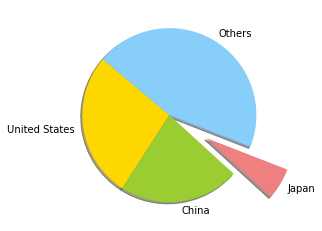

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
ax = fig.add_subplot(111)
labels = 'United States', 'China', 'Japan', 'Others'
values = [11.08, 9.15, 2.4, 18.37]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.5, 0)  # explode 1st slice
plt.plot()

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='', shadow=True, startangle=140)
plt.title=('World Market Share of Movie Industry (by annual consumption)')

plt.show()        
#say its 6% of the pie

In [539]:
import numpy as np
import matplotlib.pyplot as plt
fig1= plt.figure()
# Create data
ax= fig.add_subplot(121)
ax1 = dfja_work.plot.scatter(x='vote_Average',
                      y='Popularity',
                      c='DarkBlue')
ax2 = df_no_outliers.plot.scatter(x='vote_average',
                      y='Popularity',
                      c='Orange')
plt.title='Rating vs. Popularity'
plt.show()

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


KeyError: 'vote_Average'

<Figure size 432x288 with 0 Axes>

<Figure size 640x480 with 0 Axes>

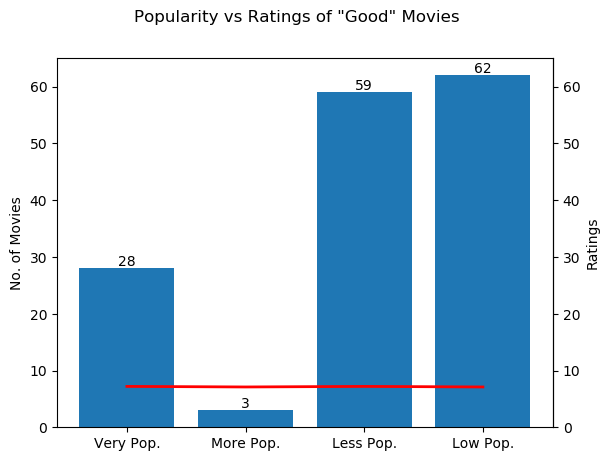

In [478]:
import numpy as np
import matplotlib.pyplot as plt
 
fig=plt.figure()

fig, ax = plt.subplots()
# ax.bar(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[28, 3, 59, 62])
ax.plot(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[7.2,7.1,7.2,7.1], color='red', linewidth=2.0)
ax.bar(['Very Pop.', 'More Pop.', 'Less Pop.', 'Low Pop.'],[28, 3, 59, 62])
ax.set_ylabel('No. of Movies')
rects = ax.patches
secax = ax.secondary_yaxis('right')
secax.set_ylabel('Ratings')
secax.set_yticks([1,2,3,4,5,6,7,8,9,10], minor=True) 
secax.set_yticklabels((1,5,10))

# Make some labels.
labels = "28", '3', '59', '62' 

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')
rects1 = ax.patches

plt.suptitle('Popularity vs Ratings of "Good" Movies')
plt.show()

In [536]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = 'Pre 2000', 'Post 2000'
Popularity = [14.6, 13.2]
Ratings = [7.4, 7.2]

x = ''  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratings')
ax.set_title('Ratings & Popularity Pre/Post 2000')
ax.set_xticks('')
ax.set_xticklabels(labels)

plt.show()

ConversionError: Failed to convert value(s) to axis units: ''

In [493]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [14.6, 13.2]
bars2 = [7.4, 7.2]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


TypeError: 'tuple' object is not callable